In [1]:
import pycaret

In [2]:
from pycaret.regression import *

In [3]:
import gradio 

In [4]:
gradio.__version__

'3.50.0'

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("volvep12.csv")

In [4]:
df

,Unnamed: 0,onstreaminject_HRS,BORE_WI_VOL,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
0,2007-01-09,0.0,0,0.0,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.000,0.0,0.0,0.0
1,2007-01-10,0.0,0,0.0,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.000,0.0,0.0,0.0
2,2007-01-11,0.0,0,0.0,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.000,0.0,0.0,0.0
3,2007-01-12,0.0,0,0.0,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.000,0.0,0.0,0.0
4,2007-01-13,0.0,0,0.0,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3286,2016-01-08,0.0,0,0.0,0.0,0.0,0.0,19.959,0.90339,0.0,0.0,0.026,0.0,0.0,0.0
3287,2016-01-09,0.0,0,0.0,0.0,0.0,0.0,19.959,0.90339,0.0,0.0,0.026,0.0,0.0,0.0
3288,2016-01-10,0.0,0,0.0,0.0,0.0,0.0,19.959,0.90339,0.0,0.0,0.026,0.0,0.0,0.0
3289,2016-01-11,0.0,0,0.0,0.0,0.0,0.0,19.959,0.90339,0.0,0.0,0.026,0.0,0.0,0.0


array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >], dtype=object)

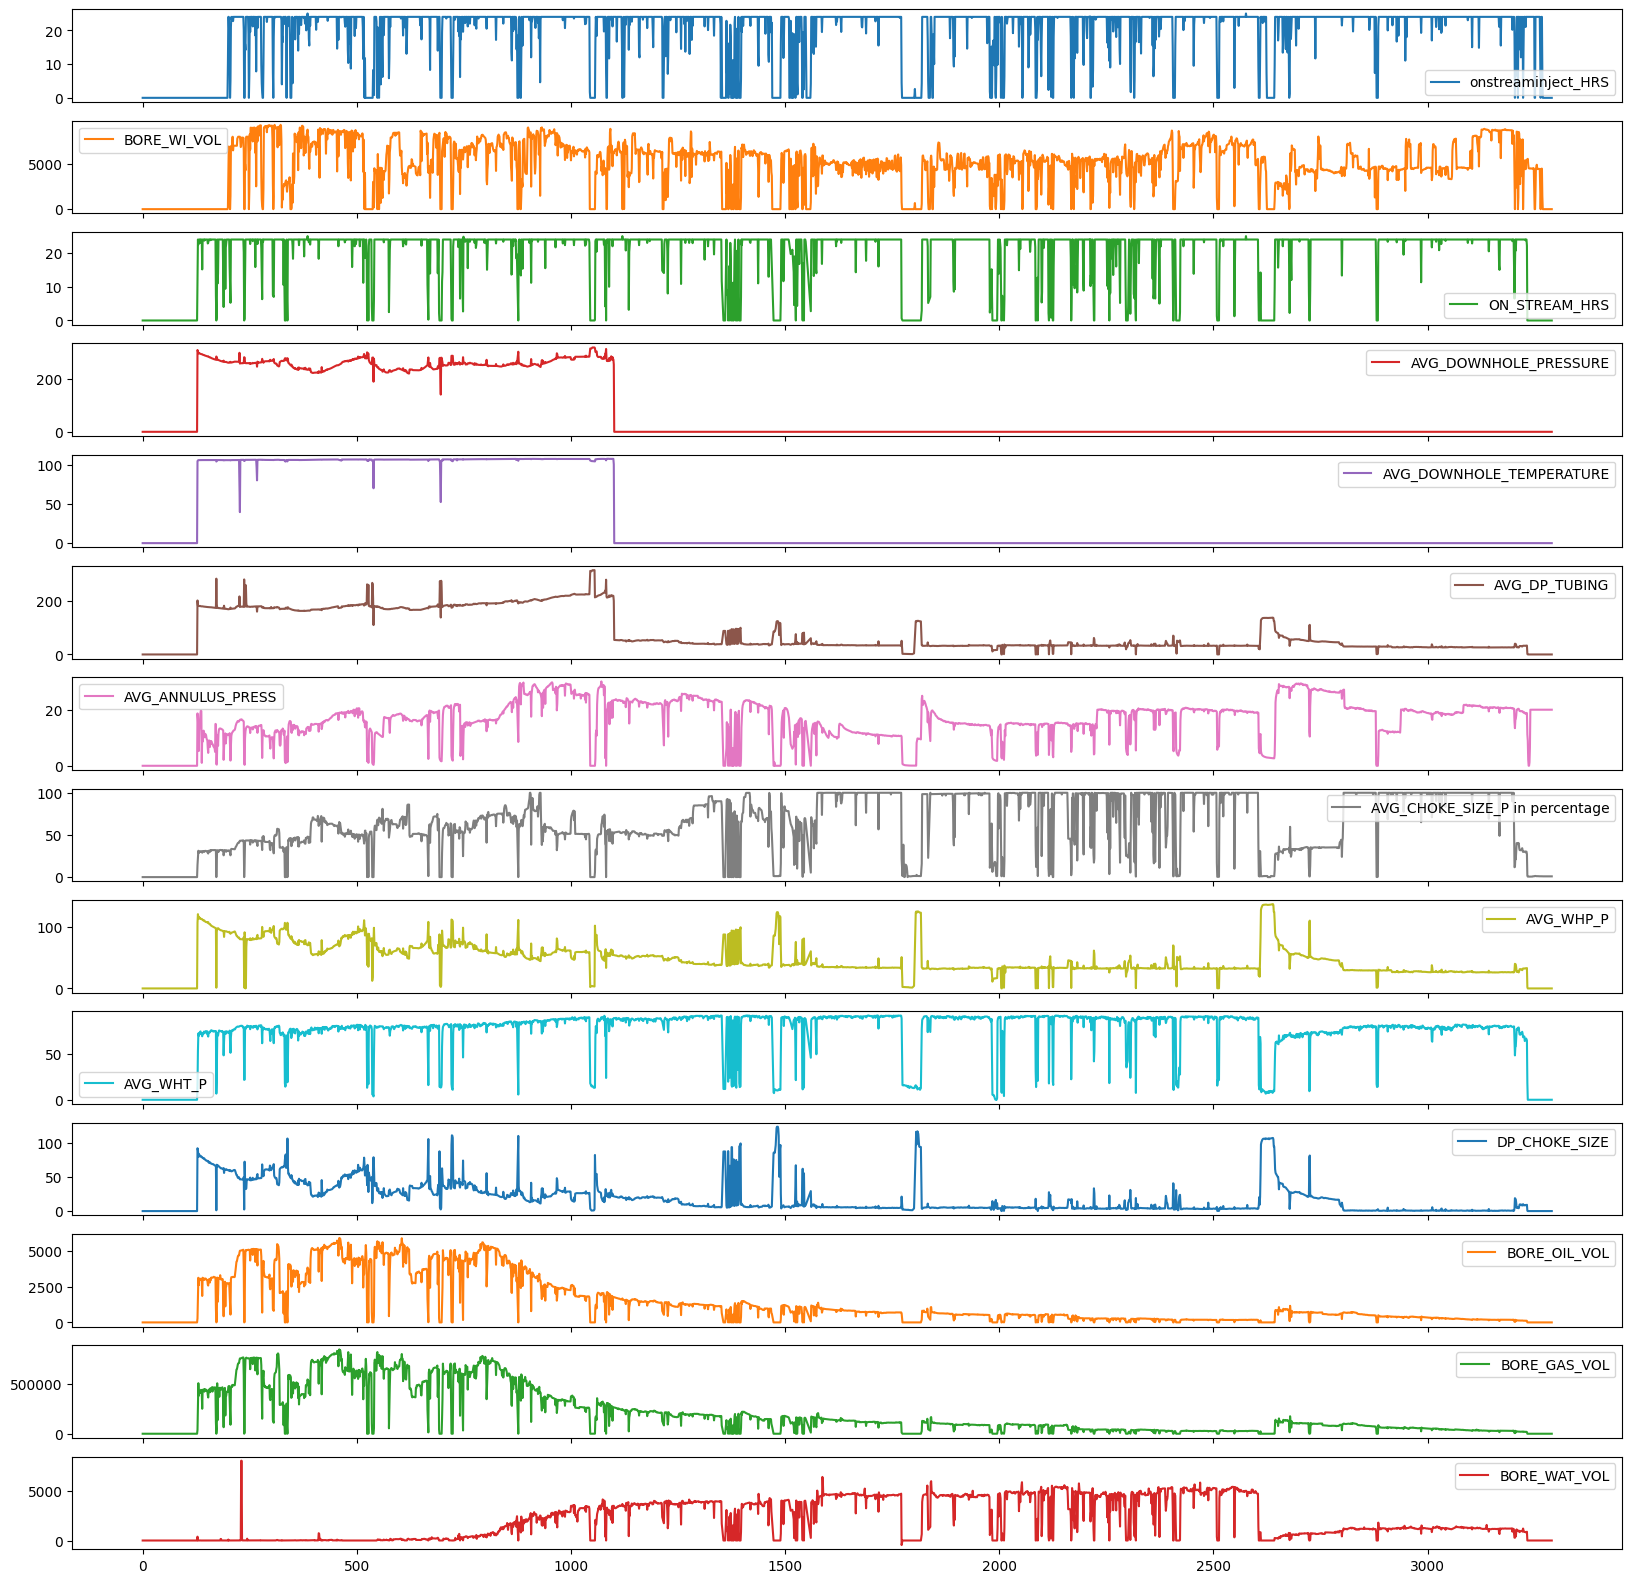

In [5]:
df.plot(subplots=True,figsize=(20,20))

In [7]:
df[100:200]

,Unnamed: 0,onstreaminject_HRS,BORE_WI_VOL,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
100,2007-04-19,0.0,0,0.00,0.000,0.000,0.000,0.000,0.00000,0.000,0.000,0.000,0.0,0.0,0.0
101,2007-04-20,0.0,0,0.00,0.000,0.000,0.000,0.000,0.00000,0.000,0.000,0.000,0.0,0.0,0.0
102,2007-04-21,0.0,0,0.00,0.000,0.000,0.000,0.000,0.00000,0.000,0.000,0.000,0.0,0.0,0.0
103,2007-04-22,0.0,0,0.00,0.000,0.000,0.000,0.000,0.00000,0.000,0.000,0.000,0.0,0.0,0.0
104,2007-04-23,0.0,0,0.00,0.000,0.000,0.000,0.000,0.00000,0.000,0.000,0.000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2007-07-23,0.0,0,22.71,263.142,105.777,170.120,9.925,30.03349,93.021,73.227,61.733,2514.0,383126.0,2.0
196,2007-07-24,0.0,0,24.00,262.170,105.787,169.532,11.180,31.48322,92.639,75.046,61.001,2753.0,418499.0,3.0
197,2007-07-25,0.0,0,24.00,261.610,105.783,169.285,11.257,31.51978,92.326,74.864,60.689,2752.0,426345.0,3.0
198,2007-07-26,0.0,0,24.00,261.115,105.777,168.946,11.160,31.48301,92.169,74.250,60.547,2737.0,422379.0,2.0


In [14]:
df[110:170]

,Unnamed: 0,onstreaminject_HRS,BORE_WI_VOL,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
110,2007-04-29,0.0,0,0.00,0.000,0.000,0.000,0.000,0.00000,0.000,0.000,0.000,0.0,0.0,0.0
111,2007-04-30,0.0,0,0.00,0.000,0.000,0.000,0.000,0.00000,0.000,0.000,0.000,0.0,0.0,0.0
112,2007-05-01,0.0,0,0.00,0.000,0.000,0.000,0.000,0.00000,0.000,0.000,0.000,0.0,0.0,0.0
113,2007-05-02,0.0,0,0.00,0.000,0.000,0.000,0.000,0.00000,0.000,0.000,0.000,0.0,0.0,0.0
114,2007-05-03,0.0,0,0.00,0.000,0.000,0.000,0.000,0.00000,0.000,0.000,0.000,0.0,0.0,0.0
115,2007-05-04,0.0,0,0.00,0.000,0.000,0.000,0.000,0.00000,0.000,0.000,0.000,0.0,0.0,0.0
116,2007-05-05,0.0,0,0.00,0.000,0.000,0.000,0.000,0.00000,0.000,0.000,0.000,0.0,0.0,0.0
117,2007-05-06,0.0,0,0.00,0.000,0.000,0.000,0.000,0.00000,0.000,0.000,0.000,0.0,0.0,0.0
118,2007-05-07,0.0,0,0.00,0.000,0.000,0.000,0.000,0.00000,0.000,0.000,0.000,0.0,0.0,0.0
119,2007-05-08,0.0,0,0.00,0.000,0.000,0.000,0.000,0.00000,0.000,0.000,0.000,0.0,0.0,0.0


array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >], dtype=object)

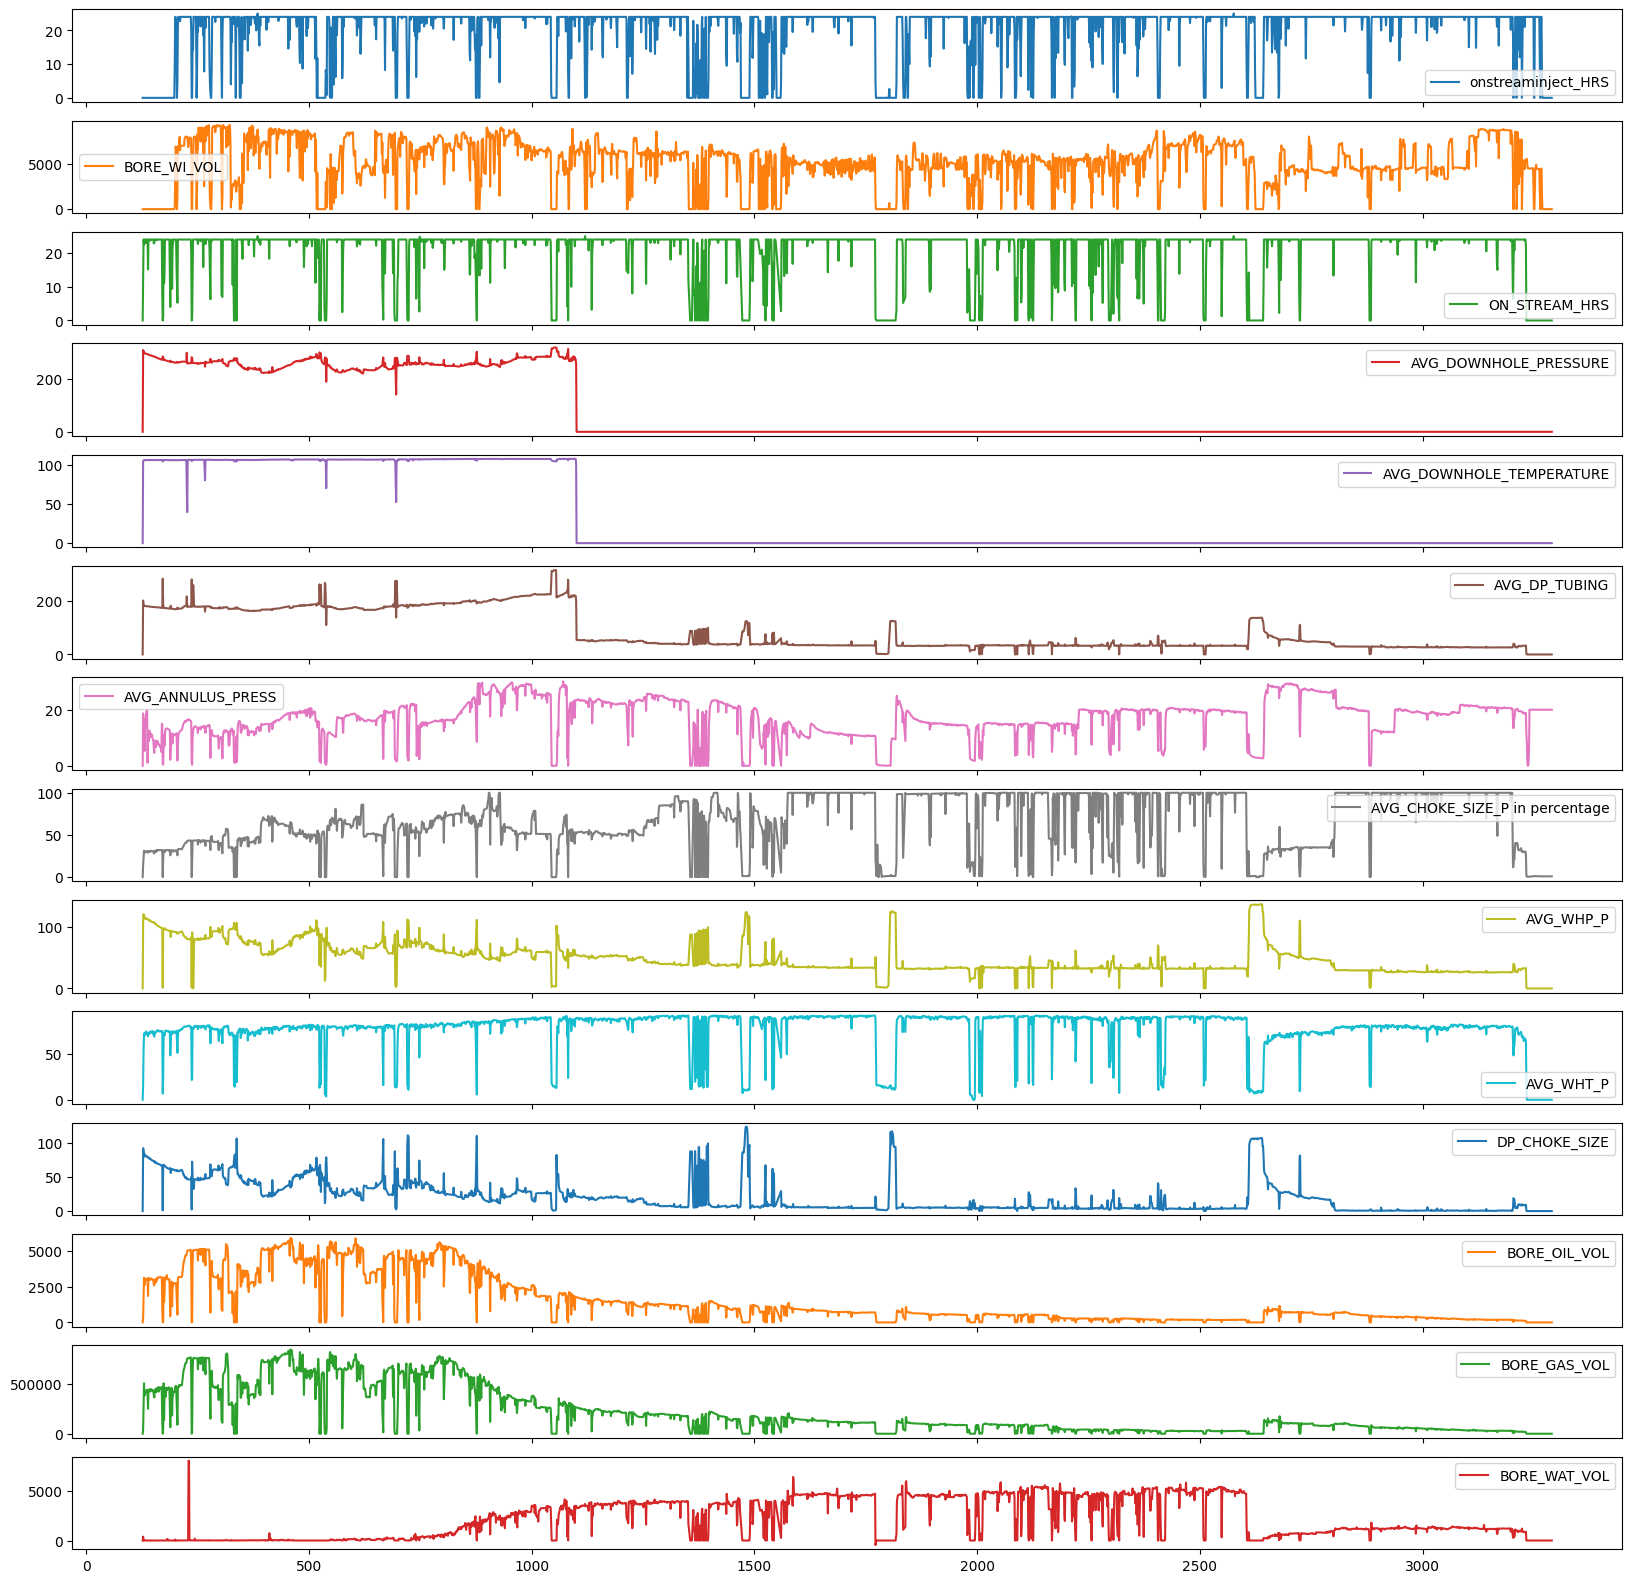

In [16]:
df[127:].plot(subplots=True,figsize=(20,20))

In [7]:
df = df[128:]

In [8]:
df.columns 

Index(['Unnamed: 0', 'onstreaminject_HRS', 'BORE_WI_VOL', 'ON_STREAM_HRS',
       'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P in percentage', 'AVG_WHP_P',
       'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL',
       'BORE_WAT_VOL'],
      dtype='object')

In [9]:
df = df.drop(['Unnamed: 0','AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE','BORE_GAS_VOL','BORE_WAT_VOL'],axis=1)

array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >], dtype=object)

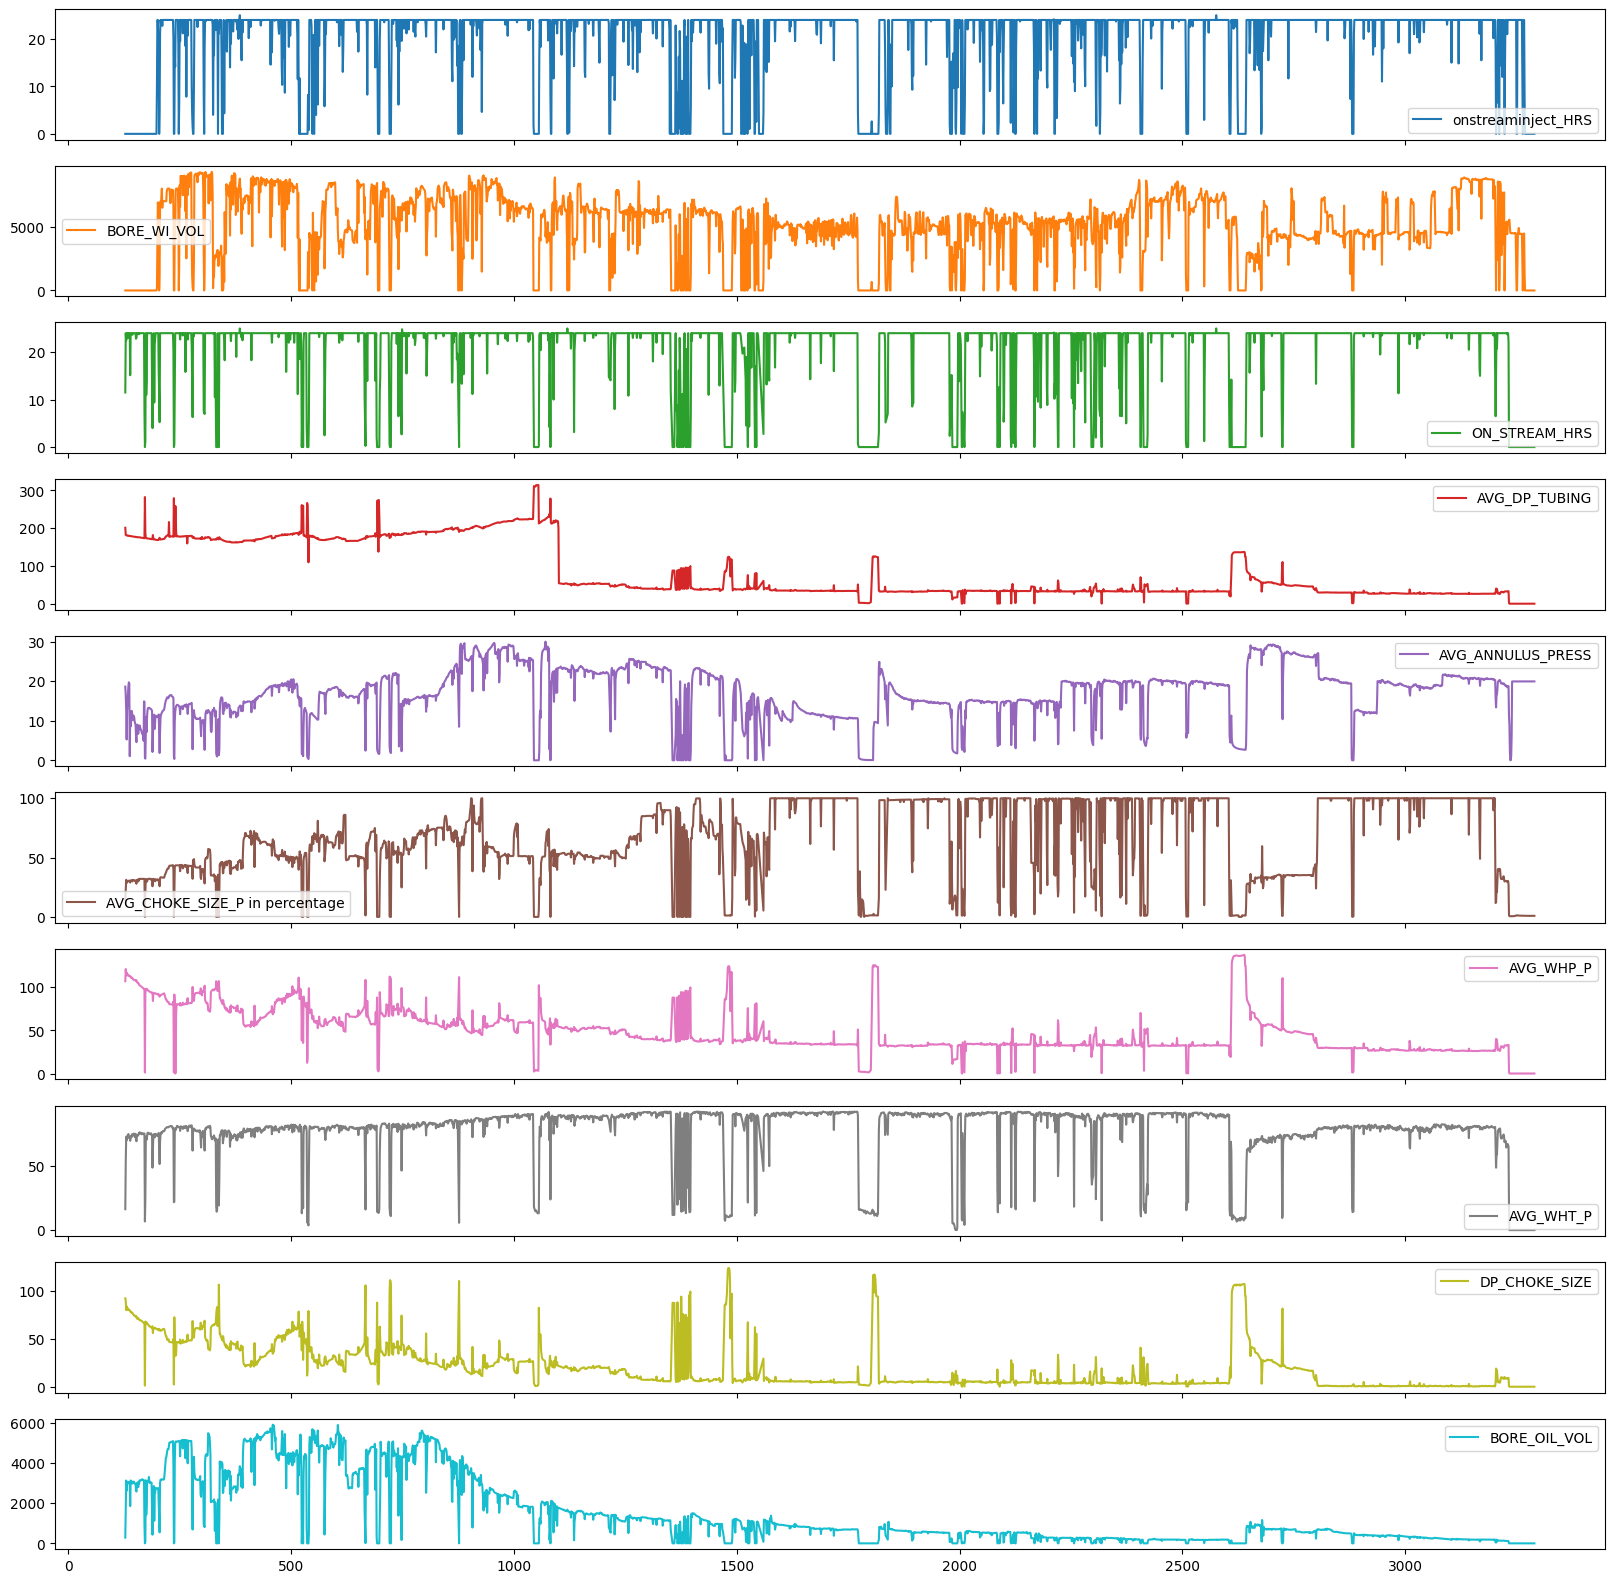

In [20]:
df.plot(subplots=True,figsize=(20,20))

In [10]:
exp = setup(data=df,target="BORE_OIL_VOL",normalize=True)

,Description,Value
0,Session id,3687
1,Target,BORE_OIL_VOL
2,Target type,Regression
3,Original data shape,"(3163, 10)"
4,Transformed data shape,"(3163, 10)"
5,Transformed train set shape,"(2214, 10)"
6,Transformed test set shape,"(949, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


In [24]:
exp.train_transformed

,onstreaminject_HRS,BORE_WI_VOL,ON_STREAM_HRS,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL
3189,0.466702,1.454278,0.431886,-0.793127,0.554788,1.040939,-0.864115,0.116618,-0.813162,183.0
803,0.020790,-0.798989,0.361222,1.381981,-0.720480,-0.826298,1.636287,-0.172177,1.589228,2517.0
1936,0.424659,-0.134383,0.431886,-0.694850,-0.318829,1.017833,-0.577233,0.622796,-0.638976,566.0
1970,0.466702,0.270372,0.431886,-0.696044,-0.379409,1.015846,-0.580718,0.640961,-0.642161,529.0
366,0.466702,1.171759,0.431886,1.094440,-0.792496,-0.826835,1.192083,-0.263560,1.146371,2726.0
...,...,...,...,...,...,...,...,...,...,...
950,0.466702,1.460349,0.431886,1.745906,1.815838,-0.257150,0.302339,0.420844,0.106972,2702.0
1339,0.466702,0.427821,0.431886,-0.639097,1.029072,0.722966,-0.414481,0.688414,-0.600196,1134.0
1476,-2.590977,-2.078822,-2.829522,0.032819,-2.620245,-2.079304,1.546927,-3.060446,2.903145,0.0
1485,-2.590977,-2.078822,-2.829522,0.375794,-2.620245,-2.079436,2.548118,-3.061512,3.979317,0.0


In [27]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,66.1172,27822.4286,160.7043,0.9897,0.3929,0.1338,0.4330
rf,Random Forest Regressor,84.0897,36504.7867,184.8884,0.9864,0.3931,0.1584,1.3690
lightgbm,Light Gradient Boosting Machine,96.6314,40883.7890,196.7583,0.9850,0.7944,0.1570,0.3700
gbr,Gradient Boosting Regressor,131.9708,51608.4970,224.6101,0.9804,0.8767,0.2156,0.5370
dt,Decision Tree Regressor,104.1432,70140.0732,255.3767,0.9737,0.4079,0.2180,0.0330
knn,K Neighbors Regressor,118.5532,77179.4883,271.2114,0.9701,0.3831,0.1974,0.0410
ada,AdaBoost Regressor,285.9530,149346.4366,384.6016,0.9432,1.6509,0.6339,0.2070
ridge,Ridge Regression,623.9038,756348.1446,866.0625,0.7148,2.0663,1.2081,0.0280
br,Bayesian Ridge,623.6496,756420.0616,866.0981,0.7148,2.0632,1.2066,0.0250
llar,Lasso Least Angle Regression,623.1258,756576.9302,866.1662,0.7148,2.0603,1.2011,0.0330


ExtraTreesRegressor(n_jobs=-1, random_state=3523)

In [28]:
md = models()

In [29]:
md

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [11]:
rf = create_model("rf")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,86.2282,71545.0968,267.4792,0.9740,0.3090,0.2195
1,86.9986,34997.0881,187.0751,0.9871,0.3165,0.1298
2,89.5229,40475.1396,201.1843,0.9848,0.4435,0.1595
3,71.8575,25679.3683,160.2478,0.9894,0.3198,0.2124
4,102.5434,65130.2447,255.2063,0.9747,0.3355,0.1662
5,97.6767,42113.4831,205.2157,0.9852,0.3506,0.0865
6,72.5356,24900.1929,157.7979,0.9903,0.2290,0.1437
7,65.1604,21643.5918,147.1176,0.9916,0.2684,0.0965
8,87.2342,35058.9515,187.2404,0.9842,0.2937,0.1664


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

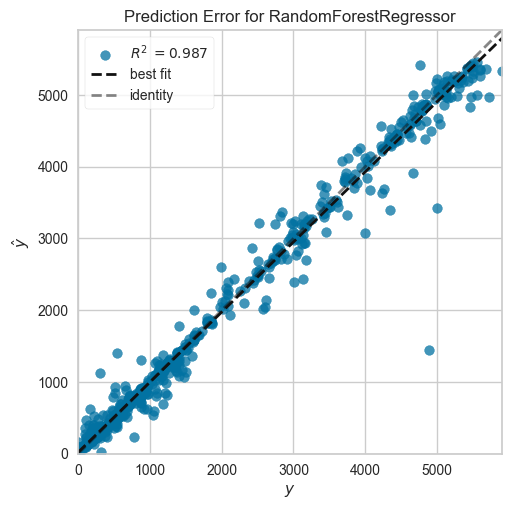

In [33]:
plot_model(rf, plot = 'error')

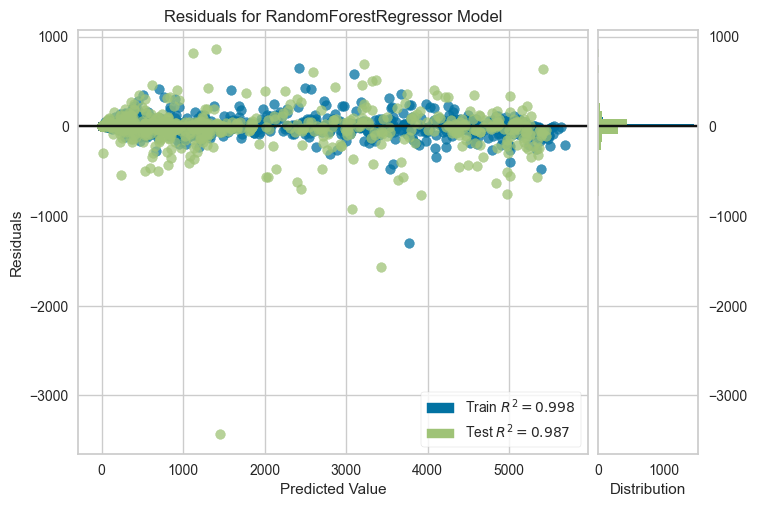

In [34]:
plot_model(rf)

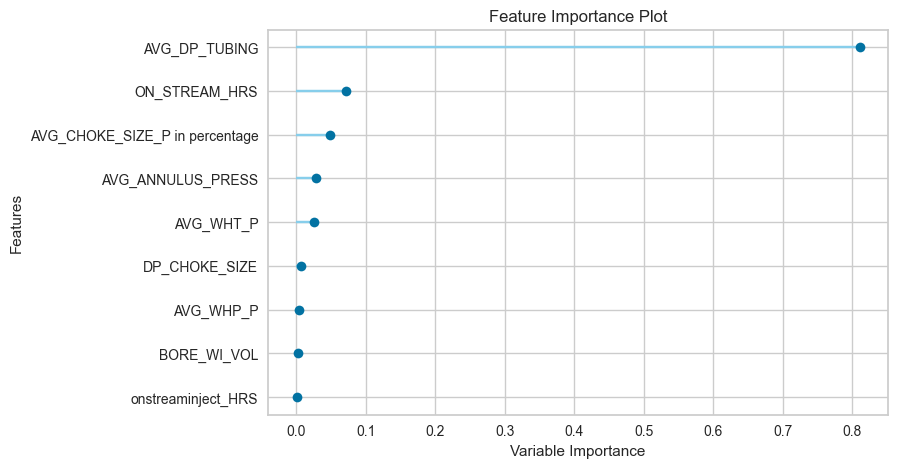

In [35]:
plot_model(rf, plot='feature')

In [37]:
final_rf = finalize_model(rf)

In [38]:
save_model(final_rf, 'rf_volvep12')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['onstreaminject_HRS',
                                              'BORE_WI_VOL', 'ON_STREAM_HRS',
                                              'AVG_DP_TUBING',
                                              'AVG_ANNULUS_PRESS',
                                              'AVG_CHOKE_SIZE_P in percentage',
                                              'AVG_WHP_P', 'AVG_WHT_P',
                                              'DP_CHOKE_SIZE'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanCol

In [4]:
rf_load= load_model("rf_volvep12")

Transformation Pipeline and Model Successfully Loaded


In [13]:
!pip install gradio==3.50

   ---------------------------------------- 0.0/20.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/20.3 MB 660.6 kB/s eta 0:00:31
    --------------------------------------- 0.3/20.3 MB 2.9 MB/s eta 0:00:07
   - -------------------------------------- 0.6/20.3 MB 4.1 MB/s eta 0:00:05
   - -------------------------------------- 1.0/20.3 MB 5.1 MB/s eta 0:00:04
   -- ------------------------------------- 1.4/20.3 MB 5.2 MB/s eta 0:00:04
   --- ------------------------------------ 1.8/20.3 MB 5.9 MB/s eta 0:00:04
   ---- ----------------------------------- 2.2/20.3 MB 6.0 MB/s eta 0:00:04
   ---- ----------------------------------- 2.4/20.3 MB 5.9 MB/s eta 0:00:04
   ------ --------------------------------- 3.2/20.3 MB 6.9 MB/s eta 0:00:03
   -------- ------------------------------- 4.2/20.3 MB 7.9 MB/s eta 0:00:03
   -------- ------------------------------- 4.2/20.3 MB 7.9 MB/s eta 0:00:03
   -------- ------------------------------- 4.2/20.3 MB 7.9 MB/s eta 0:00:03
   -

In [14]:
create_app(rf)

Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "c:\Users\acer\Anaconda3\envs\pycaret\lib\site-packages\gradio\routes.py", line 534, in predict
    output = await route_utils.call_process_api(
  File "c:\Users\acer\Anaconda3\envs\pycaret\lib\site-packages\gradio\route_utils.py", line 226, in call_process_api
    output = await app.get_blocks().process_api(
  File "c:\Users\acer\Anaconda3\envs\pycaret\lib\site-packages\gradio\blocks.py", line 1550, in process_api
    result = await self.call_function(
  File "c:\Users\acer\Anaconda3\envs\pycaret\lib\site-packages\gradio\blocks.py", line 1185, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "c:\Users\acer\Anaconda3\envs\pycaret\lib\site-packages\anyio\to_thread.py", line 56, in run_sync
    return await get_async_backend().run_sync_in_worker_thread(
  File "c:\Users\acer\Anaconda3\envs\pycaret\lib\site-packages\anyio\_backends\_asyncio.py", line 2134, in run_sync_in_worker_thread
    return await future
  File "c:\User